In [1]:
using TracyWidomBeta,LinearAlgebra,Statistics,SparseArrays,Distributions,Trapz,ApproxFun,SpecialFunctions
using RandomMatrices,Plots,LaTeXStrings,TypedTables,StatsBase,FFTW

The following waterfall plot shows the density of the Tracy-Widom distribution for $\beta=1,2,\cdots,10$ over the domain $x\in [-6,5]$ using finite-difference discretization with trapezoidal method with default values for the parameters.

In [3]:
function water_TW(B)
    x=-6:0.01:4
    dd = zeros(length(B),length(x))
    for i=1:length(B)
        global β=B[i]
        f=TW(β;pdf=true)
        for j=1:length(x)
            dd[i,j]=f(x[j])
        end
    end

    δ= 0.8
    m = length(B)
    slope = 4
    dx = 1
    dt = 1
    sc = 8
    up = 12
    C = 4

    X1 = x[1]:dx:x[end]
    X2 = B.-B[1]
    tick_shift = 0.05
    axis_shift = 0.05
    X2 = X2/X2[end]*(δ*(m-1)).+ tick_shift
    X3 = X2/slope
    x_range = [x[1],x[end]+ δ/slope*m]

    p=Plots.plot()
    for j = m:-1:1
        Plots.plot!(x .+ δ*(j-1)/slope, sc*dd[j,:] .+ δ*(j-1) .+ C, grid = false, legend = false, lw = 5, color = :black, 
            fillrange = δ*(j-1), fillcolor = :white, seriesalpha = 2, alpha = 0.9,xtickfontsize=15,ytickfontsize=15,legendfontsize=10)
    end

    ## draws the x axis
    Plots.plot!(X1, 0*X1.+0.5.+3, color = :black, yticks = false, xticks = false, xaxis = (false,x_range), 
        yaxis =(false,[0,δ*(m+5) + up]),xtickfontsize=15,ytickfontsize=15,legendfontsize=10)

    ## draws the t axis
Plots.plot!(X3 .+ x[end].+0.1, X2.+axis_shift.+0.8.+3, color = :black, yticks = false, xticks = false, xaxis = (false,x_range), 
        yaxis = (false,[0,δ*(m+5) + up]),xtickfontsize=15,ytickfontsize=15,legendfontsize=10)

    ## labelling for the t axis
    for j = 1:2:length(X3)
    Plots.annotate!(X3[j].+ x[end].+0.1, X2[j]+0.1+0.95+3, Plots.text("-"),xtickfontsize=15,ytickfontsize=15,legendfontsize=10)
    Plots.annotate!(X3[j].+ x[end].+0.3, X2[j]+0.9+3, Plots.text(B[j], :left,15),xtickfontsize=15,ytickfontsize=15,legendfontsize=10)
    end

    ## labelling for the x axis

    for j = 2:2:length(X1)
        Plots.annotate!(X1[j], 0.5+3, Plots.text("|",7),xtickfontsize=15,ytickfontsize=15,legendfontsize=10)
        Plots.annotate!(X1[j], -.4+3, Plots.text(round(X1[j]),15,:below),xtickfontsize=15,ytickfontsize=15,legendfontsize=10)
    end
    return p
end

water_TW (generic function with 1 method)

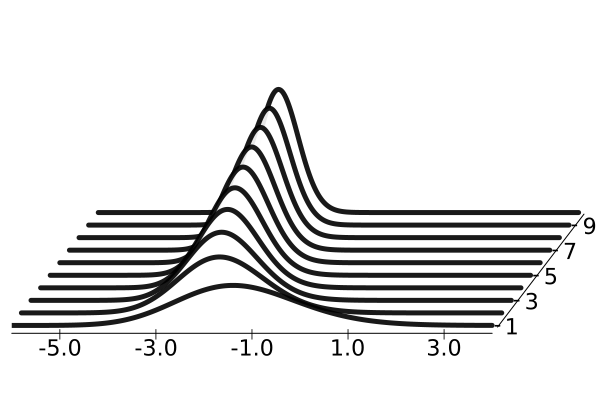

In [4]:
B=1:1:10;
p=water_TW(B)

The following plot shows the density of the Tracy-Widom distribution for $\beta=1$ to $\beta=4$ with step size$=0.2$.

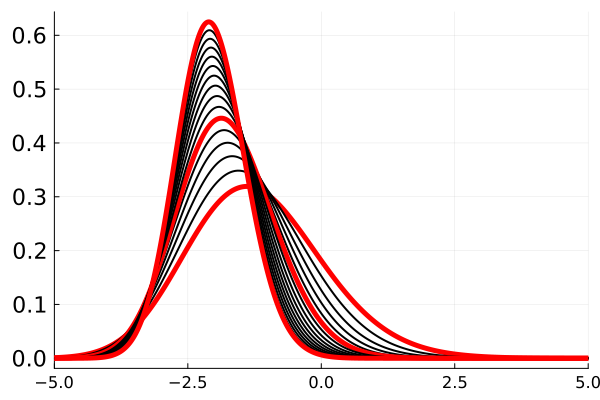

In [6]:
p=Plots.plot();
B=1:0.2:4;
for i=1:length(B)
    β=B[i]
    F_pdf=TW(β;pdf=true)
    if β==1 || β==2 || β==4
        p=plot!(F_pdf,lw=5,c=:red,xlim=(-5,5),legend = false,xtickfontsize=11,ytickfontsize=15)
    else
        p=plot!(F_pdf,lw=2,c=:black,xlim=(-5,5),legend = false,xtickfontsize=11,ytickfontsize=15)
    end
end
p